In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the data and creating DataFrame
df = pd.read_csv('./data/data_eda.csv')

In [3]:
# Checking the data
df.head()

,log_price,price,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,6.150603,469.0,100.0,True,14,False,0,0,10.0,0,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,4.543295,94.0,97.0,True,21,True,0,60,10.0,2,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,4.276666,72.0,95.0,True,36,True,0,60,10.0,2,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,4.605170,100.0,93.0,True,14,False,2,0,10.0,0,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,4.532599,93.0,99.0,True,24,False,1,58,10.0,2,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363


### In my dataframe I have both price and log_price. I will use both of them separately for modelling and compare the results.

### I will drop log_price first and do modelling on the remaining data

In [4]:
# Dropping the log_price
dfp = df.drop(['log_price'], axis = 1)
dfp.head()

,price,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,neighbourhood_cleansed,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,469.0,100.0,True,14,False,0,0,10.0,0,71,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,94.0,97.0,True,21,True,0,60,10.0,2,122,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,72.0,95.0,True,36,True,0,60,10.0,2,15,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,100.0,93.0,True,14,False,2,0,10.0,0,109,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,93.0,99.0,True,24,False,1,58,10.0,2,128,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363


In [5]:
# Split data into X and y
X = dfp.drop('price', axis = 1)
y = dfp['price']

In [6]:
# Checking X 
X

,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,neighbourhood_cleansed,accommodates,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,100.0,True,14,False,0,0,10.0,0,71,10,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,97.0,True,21,True,0,60,10.0,2,122,2,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,95.0,True,36,True,0,60,10.0,2,15,3,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,93.0,True,14,False,2,0,10.0,0,109,5,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,99.0,True,24,False,1,58,10.0,2,128,4,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,80.0,True,8,True,1,51,10.0,0,87,2,...,1.0,4,False,1.0,43.63780,1,1.00,81,7,81
10795,80.0,True,5,False,1,50,10.0,0,62,4,...,2.0,4,False,2.0,43.65734,2,1.00,70,2,70
10796,100.0,True,28,False,1,60,10.0,2,122,2,...,1.0,4,False,1.0,43.64015,1,1.00,89,4,89
10797,100.0,True,8,True,1,35,10.0,0,77,3,...,2.0,4,False,1.0,43.62431,2,1.00,65,2,65


In [7]:
# Checking y
y

0        469.0
1         94.0
2         72.0
3        100.0
4         93.0
         ...  
10794    114.0
10795     71.0
10796    195.0
10797    128.0
10798     88.0
Name: price, Length: 10799, dtype: float64

In [8]:
# Importing the train- test model from sklearn library
from sklearn.model_selection import train_test_split

In [9]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [10]:
# Checking the length of different test and train sets
len(X_train),len(y_train),len(X_test),len(y_test)

(8639, 8639, 2160, 2160)

I am going to use 5 different machine learning models:

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. K-Nearest Neighbors
5. Random Forest

### Using Linear Regression Model

In [11]:
# Importing LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
# Training Model Score
lr.score(X_train,y_train)

0.06479455635259423

In [14]:
#Making the predictions
y_preds = lr.predict(X_test)

In [15]:
# Making Predictions
y_preds

array([ 90.68663427, 208.69956282,  97.02921444, ...,  47.20614407,
       170.02220631, 111.46825629])

In [16]:
# Test Model Score
lr.score(X_test, y_test)

0.05418684649592642

In [17]:
# Importing mean_absolute_errora and mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_preds))

85.03381020061319


In [18]:
# Calculating mean_squared_error
print(mean_squared_error(y_test, y_preds))

194029.6789882984


In [19]:
# Calculating mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
rmse

440.4880009583671

Text(0, 0.5, 'Count')

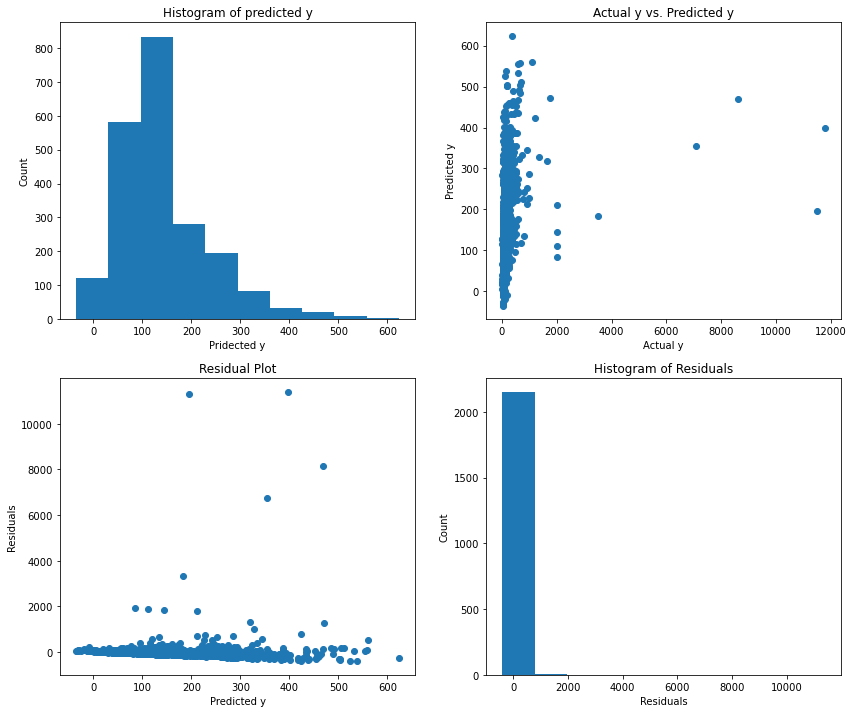

In [20]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### Using Ridge Regression

In [21]:
# Importing the model
from sklearn.linear_model import Ridge
ri = Ridge()

In [22]:
# Fitting the model on training data
ri.fit(X_train, y_train)

Ridge()

In [23]:
# Finding Train model score
ri.score(X_train, y_train)

0.06478911124553566

In [24]:
# Making Predictions
yr_preds = ri.predict(X_test)

In [25]:
# Getting Predictions
yr_preds

array([ 90.32801006, 208.35283893,  96.97480995, ...,  47.29826414,
       169.82002658, 110.40186162])

In [26]:
# Finding test model score
ri.score(X_test, y_test)

0.053954059909676944

In [27]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yr_preds))

84.95969533793003


In [28]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yr_preds))

194077.43419918272


In [29]:
# Calculating Root Mean Squared error
print(np.sqrt(mean_squared_error(y_test, yr_preds)))

440.54220478767155


Text(0, 0.5, 'Count')

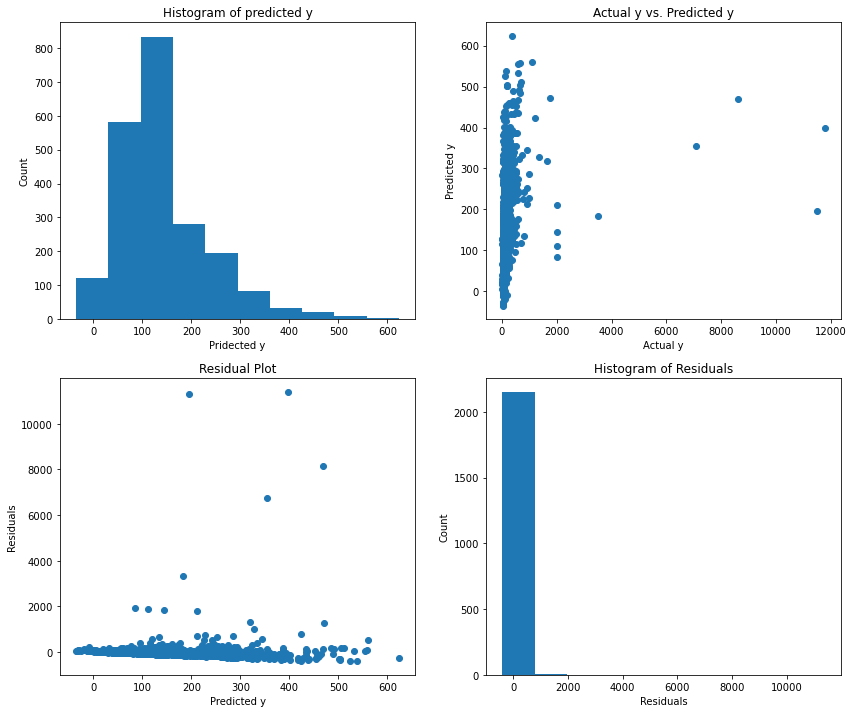

In [30]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### Using Lasso Regression

In [31]:
# Importing the model
from sklearn.linear_model import Lasso
la=Lasso()

In [32]:
# Fitting the model on training data
la.fit(X_train, y_train)

Lasso()

In [33]:
# Finding Train model score
la.score(X_train, y_train)

0.06245530626475426

In [34]:
# Making Predictions
yl_preds = la.predict(X_test)

In [35]:
# Getting Predictions
yl_preds

array([ 87.74163096, 206.06480038,  94.6050238 , ...,  51.63840431,
       166.10914205,  92.71857415])

In [36]:
# Finding test model score
la.score(X_test, y_test)

0.04658073625500281

In [37]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yl_preds))

84.39314419865593


In [38]:
# Calculating Mean Squared  error
print(mean_squared_error(y_test, yl_preds))

195590.04122573228


In [39]:
# Calculating Root Mean squared error
print(np.sqrt(mean_squared_error(y_test, yl_preds)))

442.25562882311885


Text(0, 0.5, 'Count')

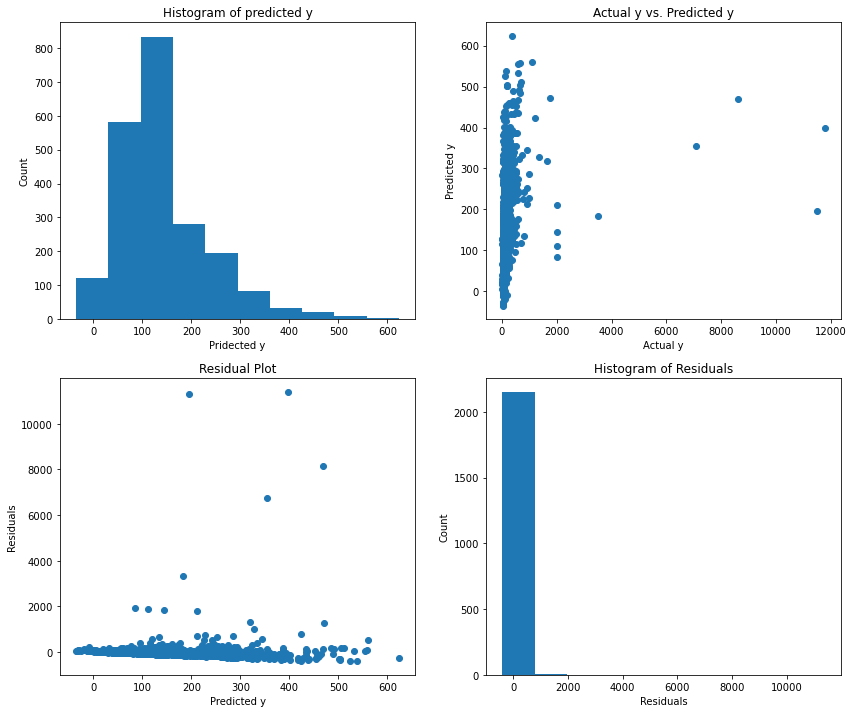

In [40]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### Using K-Nearest Neighbors

In [41]:
# Importing the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [42]:
# Fitting the model on training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [43]:
# Finding Train model score
knn.score(X_train, y_train)

0.2718762403698999

In [44]:
# Making Predictions
yk_preds = knn.predict(X_test)

In [45]:
# Getting Predictions
yk_preds

array([106.8, 303.4, 107.2, ..., 257.4, 128. ,  89.8])

In [46]:
# Finding test model score
knn.score(X_test, y_test)

-0.05334921740074061

In [47]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yk_preds))

98.59101851851854


In [48]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yk_preds))

216090.26027777774


In [49]:
# Calculating Root Mean Squared error
print(np.sqrt(mean_squared_error(y_test, yk_preds)))

464.8550960006545


Text(0, 0.5, 'Count')

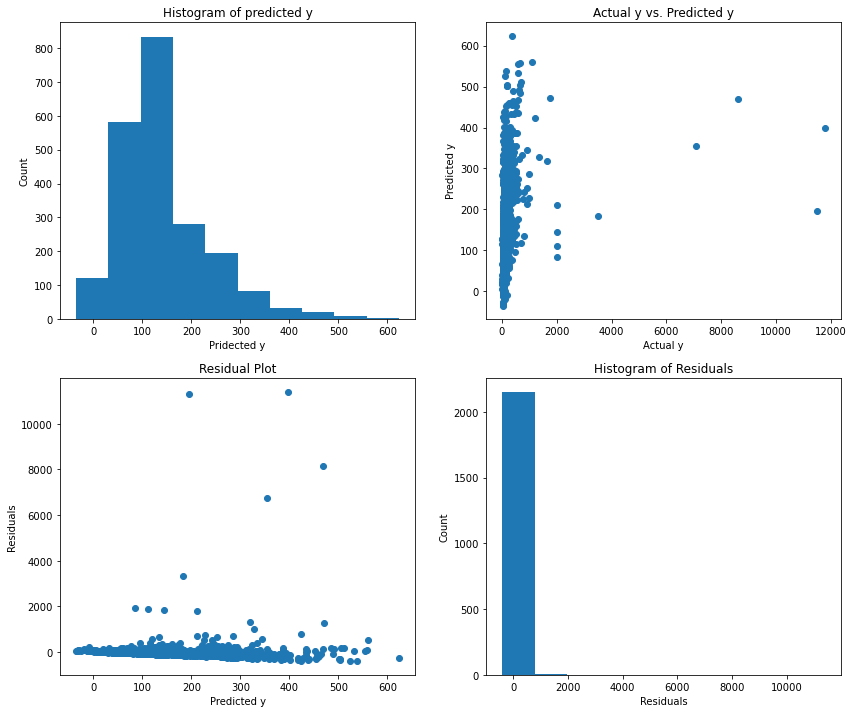

In [50]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### Using Random Forest

In [51]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [52]:
# Fitting the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
# Finding Train model score
rf.score(X_train, y_train)

0.881017026244045

In [54]:
# Making Predictions
yrf_preds = rf.predict(X_test)

In [55]:
yrf_preds

array([183.24, 162.55,  91.7 , ...,  43.57, 243.08,  44.13])

In [56]:
# Finding test model score
rf.score(X_test, y_test)

0.40560922181691605

In [57]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yrf_preds))

71.49043518518519


In [58]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yrf_preds))

121936.82384009258


In [59]:
# Calculating Root Mean Squared error
print(np.sqrt(mean_squared_error(y_test, yrf_preds)))

349.1945358107606


Text(0, 0.5, 'Count')

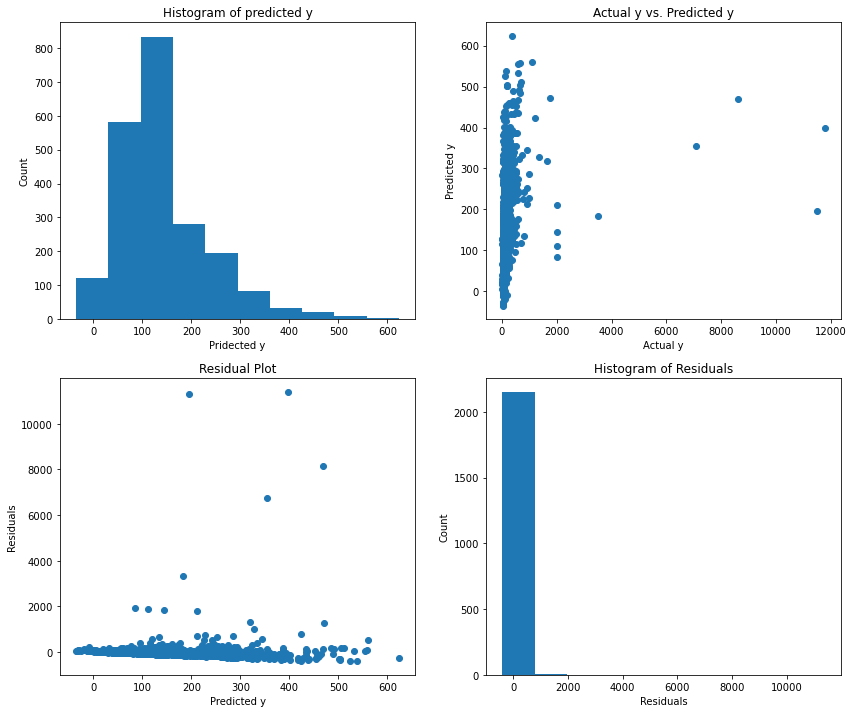

In [60]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### I will drop 'price' column now and do modelling on the remaining data

In [61]:
# Checking the original data
df.head()

,log_price,price,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,6.150603,469.0,100.0,True,14,False,0,0,10.0,0,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,4.543295,94.0,97.0,True,21,True,0,60,10.0,2,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,4.276666,72.0,95.0,True,36,True,0,60,10.0,2,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,4.605170,100.0,93.0,True,14,False,2,0,10.0,0,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,4.532599,93.0,99.0,True,24,False,1,58,10.0,2,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363


In [62]:
# Dropping the price column
dfp = df.drop(['price'], axis = 1)
dfp.head()

,log_price,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,neighbourhood_cleansed,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,6.150603,100.0,True,14,False,0,0,10.0,0,71,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,4.543295,97.0,True,21,True,0,60,10.0,2,122,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,4.276666,95.0,True,36,True,0,60,10.0,2,15,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,4.605170,93.0,True,14,False,2,0,10.0,0,109,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,4.532599,99.0,True,24,False,1,58,10.0,2,128,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363


In [63]:
# Split data into X and y
X = dfp.drop('log_price', axis = 1)
y = dfp['log_price']

In [64]:
# Checking X
X

,review_scores_rating,has_availability,property_type,instant_bookable,number_of_reviews_ltm,availability_60,review_scores_checkin,room_type,neighbourhood_cleansed,accommodates,...,beds,host_response_time,host_is_superhost,bedrooms,latitude,minimum_nights,reviews_per_month,availability_90,bathrooms_text,availability_365
0,100.0,True,14,False,0,0,10.0,0,71,10,...,7.0,1,False,5.0,43.64590,28,0.10,0,11,0
1,97.0,True,21,True,0,60,10.0,2,122,2,...,1.0,0,False,1.0,43.64080,180,1.19,90,5,365
2,95.0,True,36,True,0,60,10.0,2,15,3,...,1.0,1,False,1.0,43.69805,28,1.64,90,4,365
3,93.0,True,14,False,2,0,10.0,0,109,5,...,2.0,4,False,2.0,43.63539,30,0.86,8,2,283
4,99.0,True,24,False,1,58,10.0,2,128,4,...,2.0,3,False,2.0,43.74922,2,0.60,88,3,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10794,80.0,True,8,True,1,51,10.0,0,87,2,...,1.0,4,False,1.0,43.63780,1,1.00,81,7,81
10795,80.0,True,5,False,1,50,10.0,0,62,4,...,2.0,4,False,2.0,43.65734,2,1.00,70,2,70
10796,100.0,True,28,False,1,60,10.0,2,122,2,...,1.0,4,False,1.0,43.64015,1,1.00,89,4,89
10797,100.0,True,8,True,1,35,10.0,0,77,3,...,2.0,4,False,1.0,43.62431,2,1.00,65,2,65


In [65]:
# Checking y
y

0        6.150603
1        4.543295
2        4.276666
3        4.605170
4        4.532599
           ...   
10794    4.736198
10795    4.262680
10796    5.273000
10797    4.852030
10798    4.477337
Name: log_price, Length: 10799, dtype: float64

In [66]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [67]:
# Checking the length of different test and train sets
len(X_train),len(y_train),len(X_test),len(y_test)

(8639, 8639, 2160, 2160)

### Using Linear Regression Model

In [68]:
# Importing LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [69]:
# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
# Training Model Score
lr.score(X_train,y_train)

0.5408544300583042

In [71]:
#Making the predictions
y_preds = lr.predict(X_test)

In [72]:
y_preds

array([5.04644995, 4.37230966, 5.55146737, ..., 4.65655182, 4.55059472,
       4.77434697])

In [73]:
# Test Model Score
lr.score(X_test, y_test)

0.47406547356495343

In [74]:
# Calculating Mean Absolute Error
print(mean_absolute_error(y_test, y_preds))

0.35204433474524804


In [75]:
# Calculating mean_squared_error
print(mean_squared_error(y_test, y_preds))

0.2813577675751425


In [76]:
# Calculating Root Mean Squared Error
print(np.sqrt(mean_squared_error(y_test, y_preds)))

0.5304316804029926


Text(0, 0.5, 'Count')

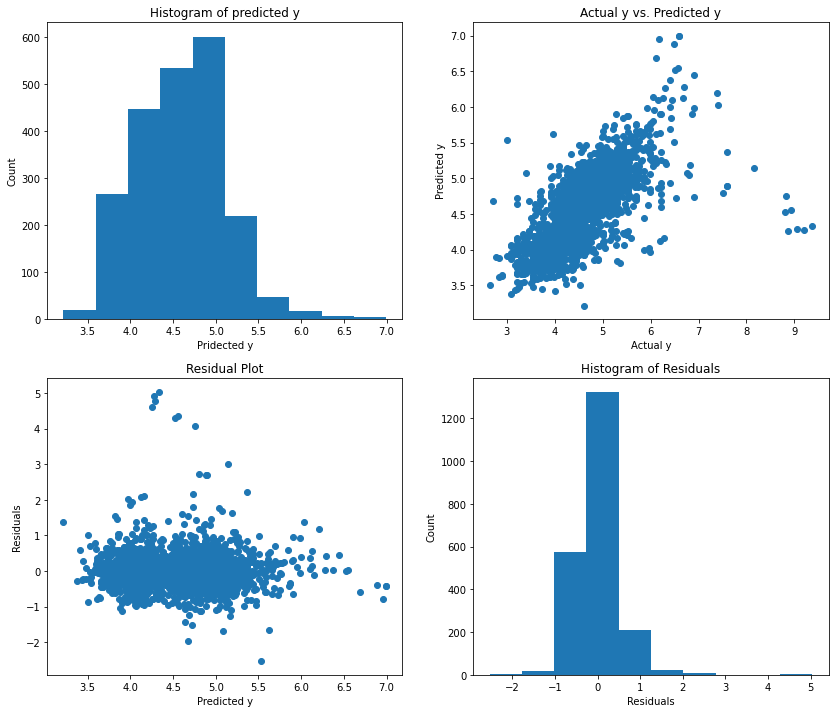

In [77]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### Using Ridge Regression

In [78]:
# Importing the model
from sklearn.linear_model import Ridge
ri = Ridge()

In [79]:
# Fitting the model on training data
ri.fit(X_train, y_train)

Ridge()

In [80]:
# Finding Train model score
ri.score(X_train, y_train)

0.5407782791854554

In [81]:
# Making Predictions
yr_preds = ri.predict(X_test)

In [82]:
yr_preds

array([5.04188165, 4.3718853 , 5.55616939, ..., 4.65772648, 4.54875481,
       4.77138481])

In [83]:
# Finding test model score
ri.score(X_test, y_test)

0.47410643616674

In [84]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yr_preds))

0.35196648670152253


In [85]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yr_preds))

0.2813358539231318


In [86]:
# Calculating Root Mean Squared error
print(np.sqrt(mean_squared_error(y_test, yr_preds)))

0.5304110235686395


Text(0, 0.5, 'Count')

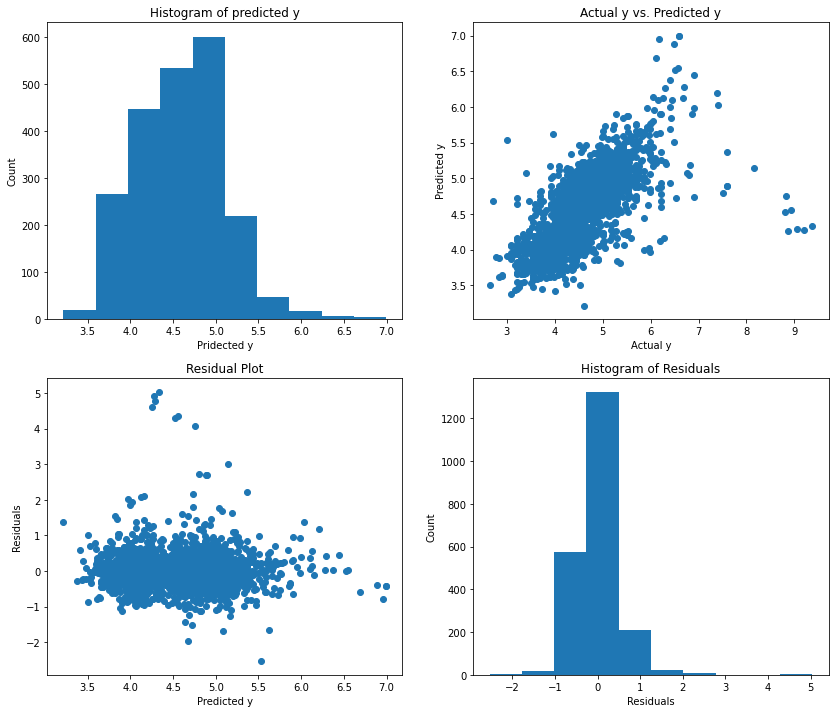

In [87]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### Using Lasso Regression

In [88]:
# Importing the model
from sklearn.linear_model import Lasso
la=Lasso()

In [89]:
# Fitting the model on training data
la.fit(X_train, y_train)

Lasso()

In [90]:
# Finding Train model score
la.score(X_train, y_train)

0.24648981571238526

In [91]:
# Making Predictions
yl_preds = la.predict(X_test)

In [92]:
# Getting Predictions
yl_preds

array([4.77375614, 4.71807134, 4.68457566, ..., 4.74905638, 4.82805548,
       4.78614275])

In [93]:
# Finding test model score
la.score(X_test, y_test)

0.2001024669205388

In [94]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yl_preds))

0.46600614813776514


In [95]:
# Calculating Mean Squared  error
print(mean_squared_error(y_test, yl_preds))

0.4279190144096687


In [96]:
# Calculating Root Mean squared error
print(np.sqrt(mean_squared_error(y_test, yl_preds)))

0.654155191380202


Text(0, 0.5, 'Count')

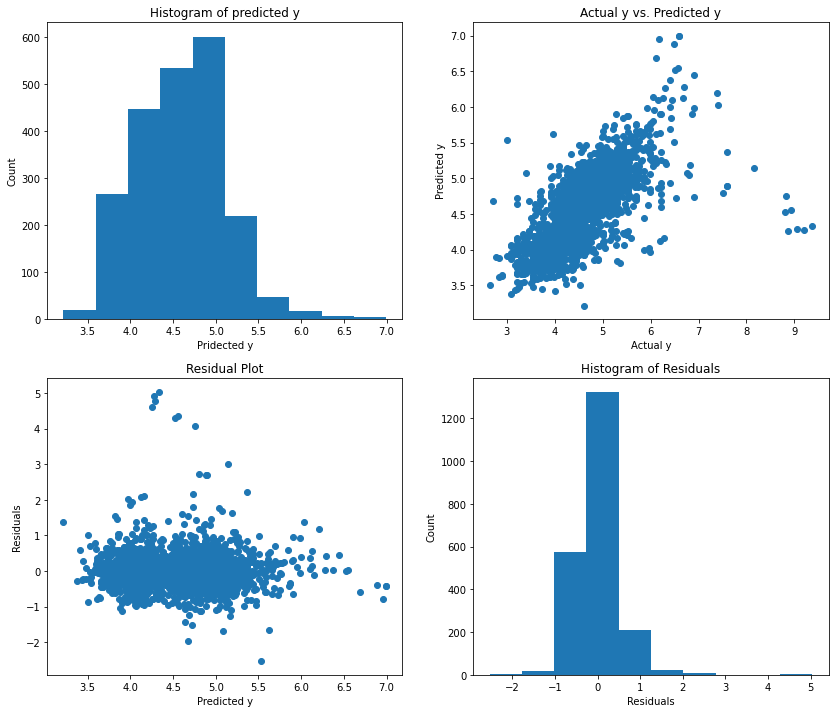

In [97]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### Using K-Nearest Neighbors

In [98]:
# Importing the model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [99]:
# Fitting the model on training data
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [100]:
# Finding Train model score
knn.score(X_train, y_train)

0.5837302672951772

In [101]:
# Making Predictions
yk_preds = knn.predict(X_test)

In [102]:
yk_preds

array([4.69917071, 4.62386537, 5.05952823, ..., 4.7037161 , 4.59026858,
       5.09850376])

In [103]:
# Finding test model score
knn.score(X_test, y_test)

0.29979399100073745

In [104]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yk_preds))

0.4269426748215221


In [105]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yk_preds))

0.37458731007853585


In [106]:
# Calculating Root Mean Squared error
print(np.sqrt(mean_squared_error(y_test, yk_preds)))

0.6120353830282493


Text(0, 0.5, 'Count')

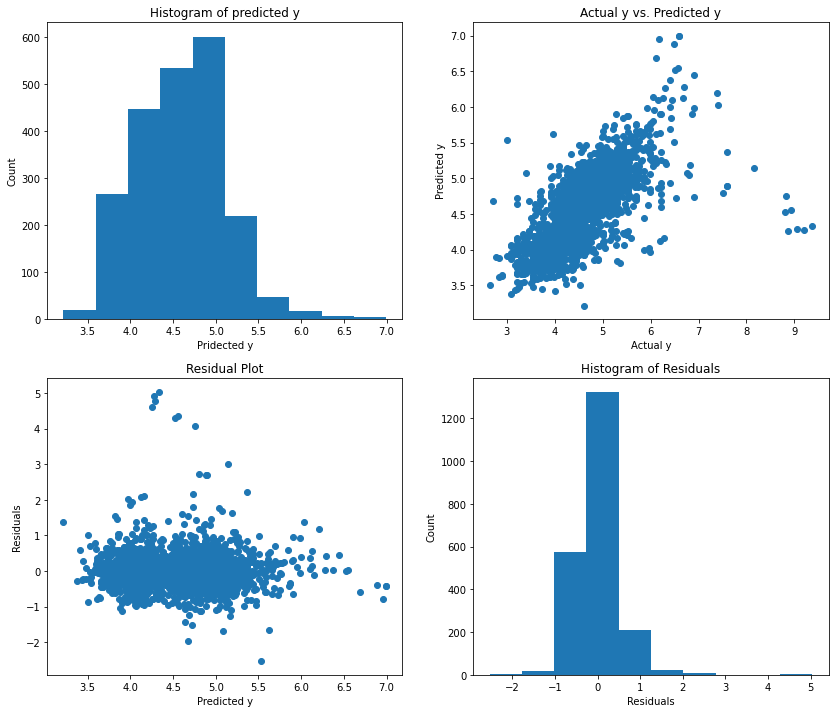

In [107]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### Using Random Forest

In [108]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [109]:
# Fitting the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [110]:
# Finding Train model score
rf.score(X_train, y_train)

0.9465464075113842

In [111]:
# Making Predictions
yrf_preds = rf.predict(X_test)
yrf_preds

array([4.98606184, 4.8562618 , 5.69258966, ..., 4.47393911, 4.59912204,
       4.81841216])

In [112]:
# Finding test model score
rf.score(X_test, y_test)

0.5983819580625414

In [113]:
# Calculating Mean absolute error
print(mean_absolute_error(y_test, yrf_preds))

0.3116003274132431


In [114]:
# Calculating Mean Squared error
print(mean_squared_error(y_test, yrf_preds))

0.21485251493824253


In [115]:
# Calculating Root Mean Squared error
print(np.sqrt(mean_squared_error(y_test, yrf_preds)))

0.46352186025930053


Text(0, 0.5, 'Count')

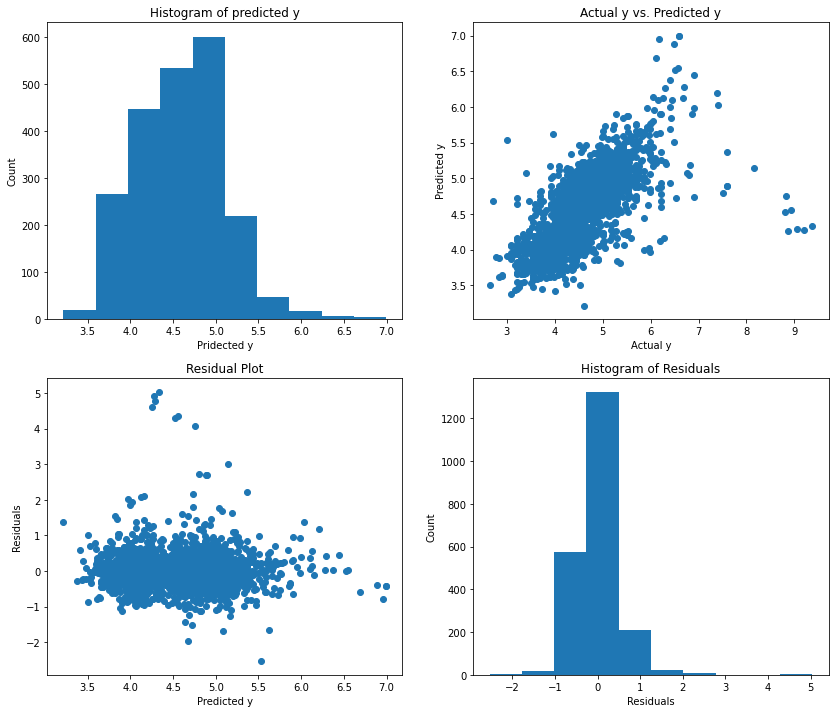

In [116]:
fig,ax = plt.subplots(nrows = 2, ncols =2, figsize = (14,12))
ax[0,0].hist(y_preds)
ax[0,0].set_title('Histogram of predicted y')
ax[0,0].set_xlabel('Pridected y')
ax[0,0].set_ylabel('Count')

ax[0,1].scatter(y_test, y_preds)
ax[0,1].set_title('Actual y vs. Predicted y')
ax[0,1].set_xlabel('Actual y')
ax[0,1].set_ylabel('Predicted y')

ax[1,0].scatter(y_preds, y_test - y_preds)
ax[1,0].set_title('Residual Plot')
ax[1,0].set_xlabel('Predicted y')
ax[1,0].set_ylabel('Residuals')

ax[1,1].hist(y_test - y_preds)
ax[1,1].set_title('Histogram of Residuals')
ax[1,1].set_xlabel('Residuals')
ax[1,1].set_ylabel('Count')

### Conclusion

I tried 5 different models on Airbnb listing price prediction

1. K-Nearest Neighbors
2. Linear Regression
3. Ridge Regression
4. Lasso Regression
5. Random Forest